# Literature

https://towardsdatascience.com/fetching-green-areas-from-osm-data-a6ff835c40dc 
https://pygis.io/docs/d_access_osm.html 
https://www.openstreetmap.org/relation/1674530#map=14/-33.4598/-70.6429 

In [83]:
# Specify the name that is used to seach for the data
place_name = "Provincia de Santiago, Region Metropolitana, Chile"

Let’s also plot the Polygon that represents the boundary of our area of interest (Washington DC). We can retrieve the Polygon geometry using the ox.geocode_to_gdf [docs](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) function.


In [84]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


As the name of the function already tells us, gdf_from_place()returns a GeoDataFrame based on the specified place name query.

In [85]:
# Check the data type
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-70.95522 -33.44440, -70.95504 -33.4...",-33.096935,-33.627482,-70.176148,-70.955215,308149172,relation,1674530,-33.36226,-70.501911,"Provincia de Santiago, Santiago Metropolitan R...",boundary,administrative,0.86474


Let’s still verify the data type:

In [86]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Finally, let’s plot it.



<AxesSubplot:>

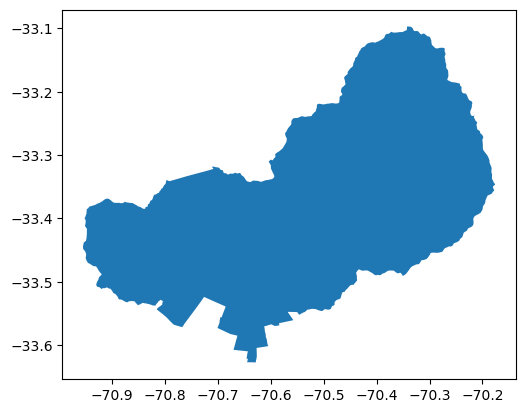

In [87]:
area.plot()


# OSM Building footprints


It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let’s download the buildings with ox.geometries_from_place docs function and plot them on top of our street network in Kamppi.

When fetching spesific types of geometries from OpenStreetMap using OSMnx geometries_from_place we also need to specify the correct tags. For getting all types of buildings, we can use the tag building=yes.

In [28]:
# List key-value pairs for tags
tags = {'building': True}   
place_name = "Santiago, Region Metropolitana, Chile"

Santiago = ox.geometries_from_place(place_name, tags)
buildings.head()
place_name = "Providencia, Region Metropolitana, Chile"

Providencia = ox.geometries_from_place(place_name, tags)
buildings.head()

/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:798: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestrings):
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geo

,unique_id,osmid,element_type,source,geometry,addr:city,addr:country,addr:housenumber,addr:street,building,...,building:part,operator:type,social_facility,diet:healthy,second_hand,ways,name:ko,website_1,name:de,name:pt
0,node/2705894787,2705894787,node,personal,POINT (-70.67467 -33.45060),NaN,NaN,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/3003516366,3003516366,node,NaN,POINT (-70.65279 -33.44968),Santiago,NaN,285,Paseo Presidente Bulnes,public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/3058070518,3058070518,node,NaN,POINT (-70.66118 -33.44768),NaN,NaN,NaN,NaN,commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/3058070519,3058070519,node,NaN,POINT (-70.66127 -33.44734),NaN,NaN,NaN,NaN,commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/3058070520,3058070520,node,NaN,POINT (-70.66125 -33.44743),NaN,NaN,NaN,NaN,commercial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Plot footprints 
Santiago.groupby("building").count()

,unique_id,osmid,element_type,source,geometry,addr:city,addr:country,addr:housenumber,addr:street,leisure,...,building:part,operator:type,social_facility,diet:healthy,second_hand,ways,name:ko,website_1,name:de,name:pt
building,,,,,,,,,,,,,,,,,,,,,
Fundacion,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
allotment_house,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apartments,428,428,428,0,428,208,3,202,255,0,...,0,0,0,0,0,4,0,0,0,0
chapel,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
church,35,35,35,1,35,7,0,5,9,0,...,0,0,0,0,0,1,0,0,0,0
civic,5,5,5,0,5,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
college,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
commercial,354,354,354,52,354,59,1,44,74,0,...,0,0,0,0,0,4,0,0,0,0
construction,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

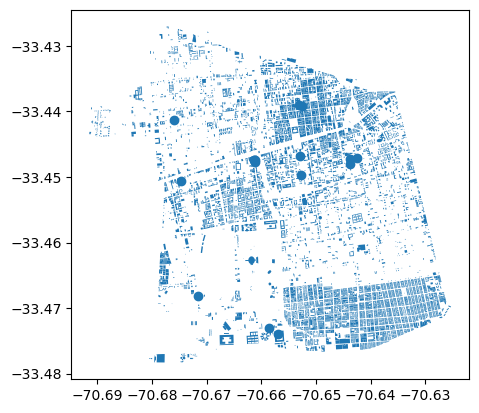

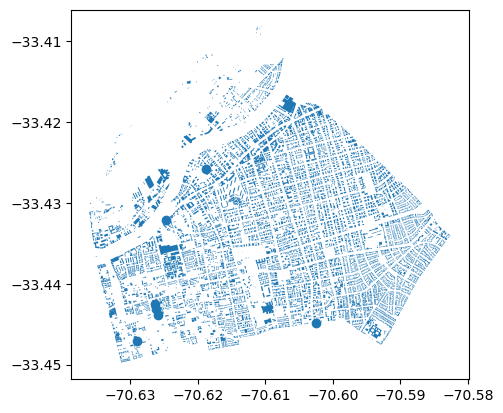

In [29]:
Santiago{}.plot()
Providencia.plot()


# Get public parks

In [32]:
import matplotlib.pyplot as plt
# import osmnx
import osmnx as ox
import geopandas as gpd

/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over m

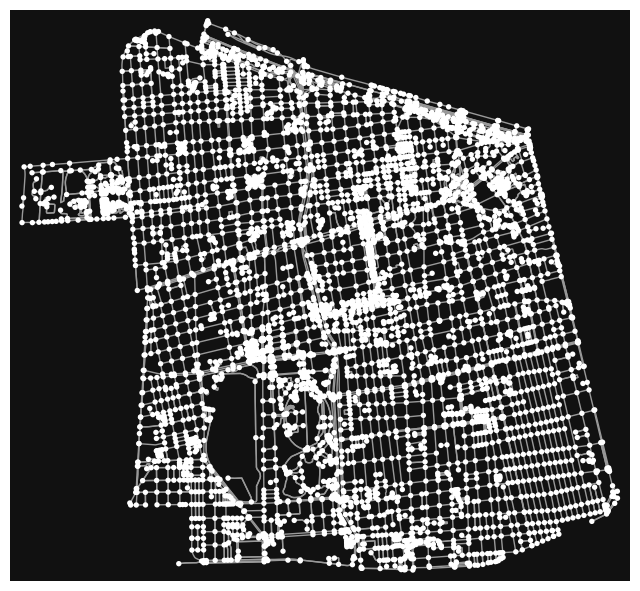

In [124]:
# Specify the name that is used to seach for the data
place_name = "Santiago, Region Metropolitana, Chile"
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
# Plot the streets
fig, ax = ox.plot_graph(graph)

Get the Edges (street network) into a GeoDataFrame



In [125]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

Get the place name (Toledo) into a GeoDataFrame



/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


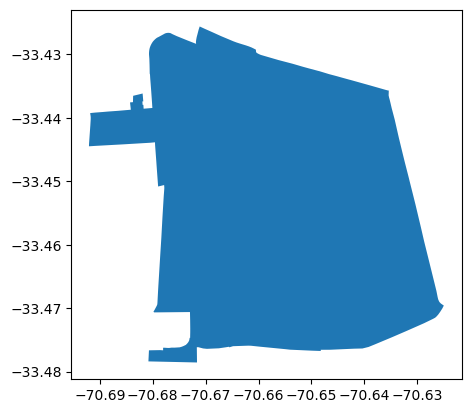

In [126]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area.plot();


Get the building's geometry with tags and place name as GeoDataFrame



In [127]:
# List key-value pairs for tags
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:798: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestrings):
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geo

The tag for green areas/parks is tricky but hopefully, you can find all objects you need in the OSM wiki. Now, let’s get the green areas as GeoDataFrame

/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


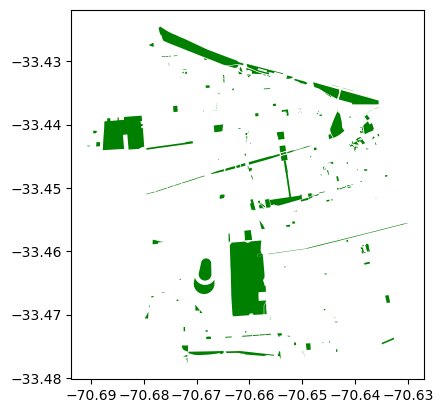

In [128]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}
# Get the data
parks = ox.geometries_from_place(place_name, tags)
parks.plot(color="green");

(-70.69540552000001, -70.62164348, -33.481218625000004, -33.422944475)

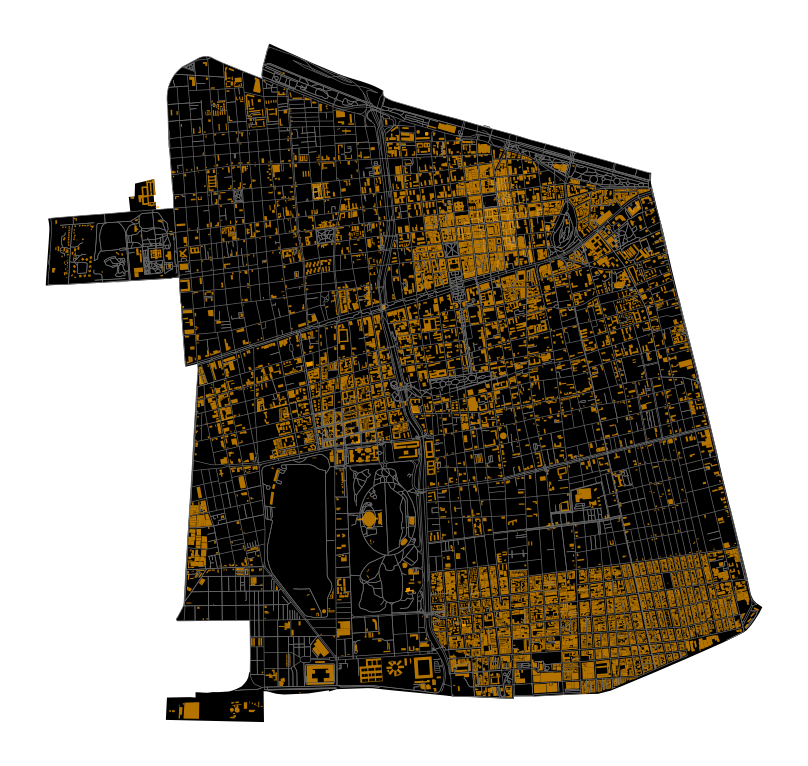

In [132]:
fig, ax = plt.subplots(figsize=(12,8))
# Plot the footprint
area.plot(ax=ax, facecolor='black', zorder=0)
# Plot street edges
edges.plot(ax=ax, linewidth=0.5, edgecolor='dimgray', zorder=1)
# Plot buildings
#buildings[buildings["building"]=='industrial'].plot(ax=ax, facecolor='cyan', alpha=0.7, zorder=2)
buildings[buildings.geometry.type=="Polygon"].plot(ax=ax, facecolor='orange', alpha=0.7, zorder=2)

# Plot parks
#parks.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)
plt.tight_layout()
plt.axis('off')

# 

# Combine map of Santiago and Providencia

In [67]:
import matplotlib.pyplot as plt
# import osmnx
import osmnx as ox
import geopandas as gpd
# Specify the name that is used to seach for the data
place_name = "Santiago, Region Metropolitana, Chile"
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
area_santiago = ox.geocode_to_gdf(place_name)
# Retrieve nodes and edges
nodes, edges_santiago = ox.graph_to_gdfs(graph)

# Specify the name that is used to seach for the data
place_name = "Providencia, Region Metropolitana, Chile"
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
area_providencia = ox.geocode_to_gdf(place_name)
# Retrieve nodes and edges
nodes, edges_providencia = ox.graph_to_gdfs(graph)

# Specify the name that is used to seach for the data
place_name = "Las Condes, Region Metropolitana, Chile"
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
area_condes = ox.geocode_to_gdf(place_name)
# Retrieve nodes and edges
nodes, edges_condes = ox.graph_to_gdfs(graph)

/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over m

In [68]:
# List key-value pairs for tags
tags = {'building': True}
place_name = "Santiago, Region Metropolitana, Chile"
buildings_santiago = ox.geometries_from_place(place_name, tags)
tags = {'leisure': 'park', 'landuse': 'grass'}
parks_santiago = ox.geometries_from_place(place_name, tags)

place_name = "Providencia, Region Metropolitana, Chile"
buildings_providencia = ox.geometries_from_place(place_name, tags)
tags = {'leisure': 'park', 'landuse': 'grass'}
parks_providencia = ox.geometries_from_place(place_name, tags)

place_name = "Providencia, Region Metropolitana, Chile"
buildings_providencia = ox.geometries_from_place(place_name, tags)
tags = {'leisure': 'park', 'landuse': 'grass'}
parks_providencia = ox.geometries_from_place(place_name, tags)


/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:798: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestrings):
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geo

(-70.994168875, -70.13719462499999, -33.654009555, -33.070407745000004)

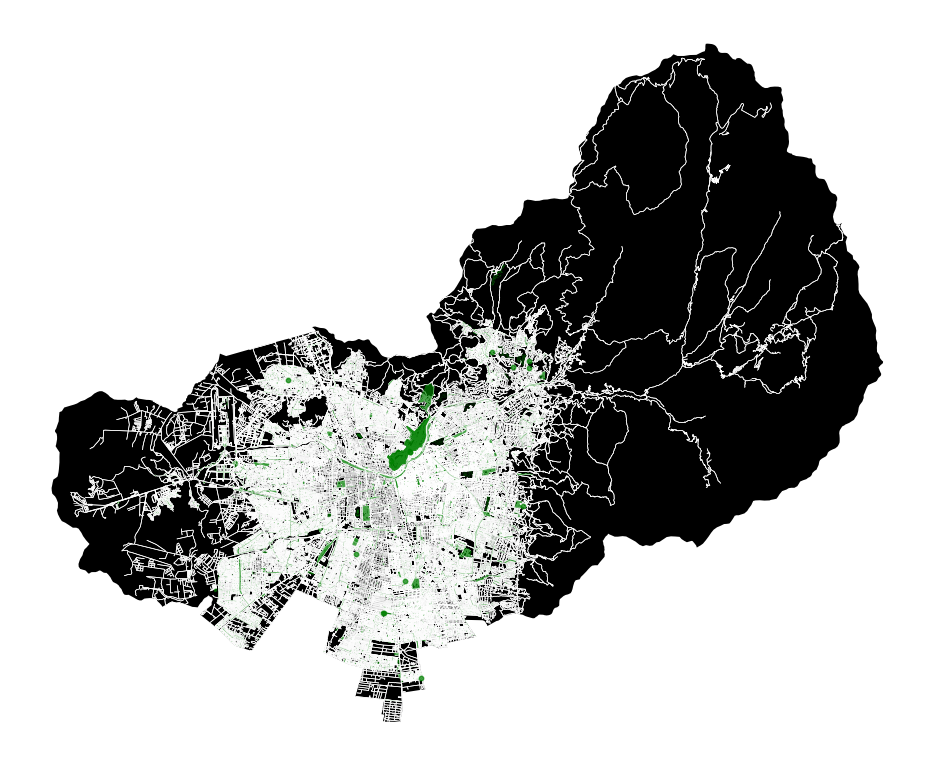

In [106]:
fig, ax = plt.subplots(figsize=(12,8))
# Plot the footprint
area_santiago.plot(ax=ax, facecolor='black', zorder=0)
area_providencia.plot(ax=ax, facecolor='dimgray', zorder=0)

# Plot street edges
edges_santiago.plot(ax=ax, linewidth=0.5, edgecolor='white', zorder=1)
edges_providencia.plot(ax=ax, linewidth=0.5, edgecolor='white', zorder=1)

# Plot buildings
#buildings[buildings["building"]=='industrial'].plot(ax=ax, facecolor='cyan', alpha=0.7, zorder=2)
#buildings.plot(ax=ax, facecolor='white', alpha=0.7, zorder=2)

# Plot parks
parks_santiago.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)
parks_providencia.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)

plt.tight_layout()
plt.axis('off')

In [ ]:
import matplotlib.pyplot as plt
# import osmnx
import osmnx as ox
import geopandas as gpd
# Specify the name that is used to seach for the data
place_name = "Chile"
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
area_santiago = ox.geocode_to_gdf(place_name)
# Retrieve nodes and edges
nodes, edges_santiago = ox.graph_to_gdfs(graph)
# List key-value pairs for tags
tags = {'building': True}
buildings_santiago = ox.geometries_from_place(place_name, tags)
tags = {'leisure': 'park', 'landuse': 'grass'}
parks_santiago = ox.geometries_from_place(place_name, tags)

/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/dumont/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over m

In [ ]:
fig, ax = plt.subplots(facecolor='white',figsize=(12,8))
# Plot the footprint
area_santiago.plot(ax=ax, facecolor='black', zorder=0)
# Plot street edges
edges_santiago.plot(ax=ax, linewidth=0.1, edgecolor='orange', zorder=1)

# Plot buildings
#buildings[buildings["building"]=='industrial'].plot(ax=ax, facecolor='cyan', alpha=0.7, zorder=2)
#buildings.plot(ax=ax, facecolor='white', alpha=0.7, zorder=2)

# Plot parks=
#parks_santiago.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)

plt.tight_layout()
plt.axis('off')

(-70.994168875, -70.13719462499999, -33.654009555, -33.070407745000004)

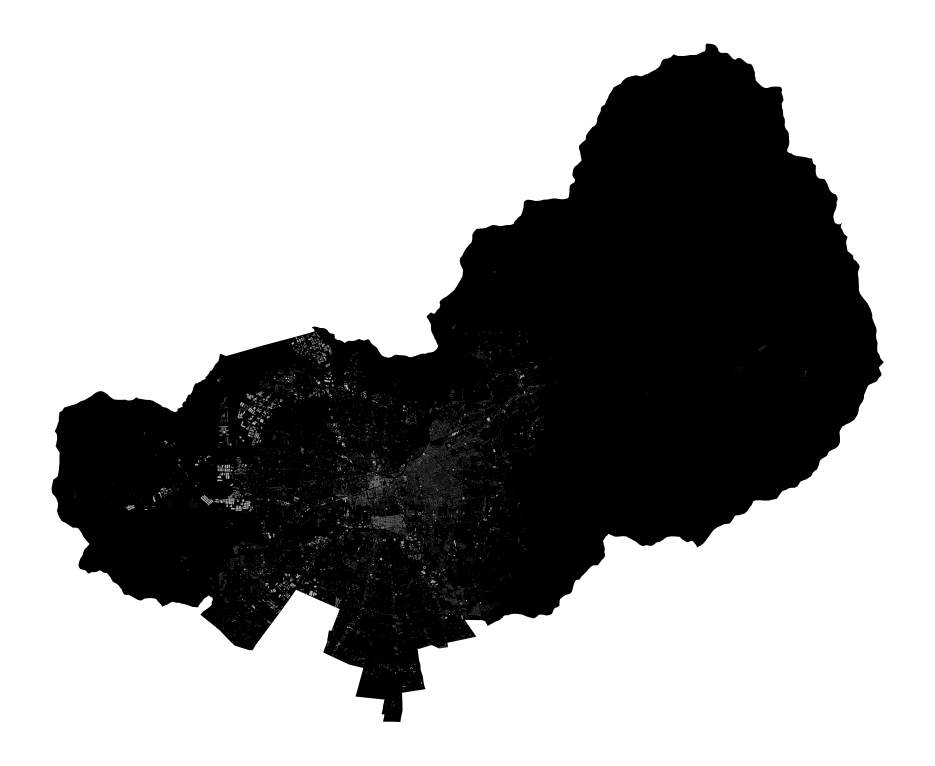

In [122]:
fig, ax = plt.subplots(facecolor='white',figsize=(12,8))
# Plot the footprint
area_santiago.plot(ax=ax, facecolor='black', zorder=0)
# Plot street edges
#edges_santiago.plot(ax=ax, linewidth=0.1, edgecolor='silver', zorder=1)

# Plot buildings
#buildings[buildings["building"]=='industrial'].plot(ax=ax, facecolor='cyan', alpha=0.7, zorder=2)
buildings_santiago[buildings_santiago.geometry.type=="Polygon"].plot(ax=ax, facecolor='white', alpha=0.7, zorder=2)

# Plot parks
#parks_santiago.plot(ax=ax, color='green', alpha=0.7, markersize=10, zorder=3)

plt.tight_layout()
plt.axis('off')

In [121]:
buildings_santiago[buildings_santiago.geometry.type=="Polygon"]

,unique_id,osmid,element_type,source,geometry,amenity,addr:city,addr:street,brand,brand:wikidata,...,communication,hot_water,heating,seasonal,not:operator:wikidata,grades,ways,name:pt,short_name:pt,website_1
117,way/23393750,23393750,way,Reconocimiento cortográfico de campo 2016 por KG,"POLYGON ((-70.68894 -33.45415, -70.68759 -33.4...",bus_station,Estación Central,Avenida Libertador Bernardo O'Higgins,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,way/23477423,23477423,way,Reconocimiento cartográfico 2016 por KG.,"POLYGON ((-70.54633 -33.39266, -70.54618 -33.3...",NaN,Las Condes,Avenida Presidente Kennedy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,way/23674761,23674761,way,NaN,"POLYGON ((-70.57129 -33.44724, -70.57117 -33.4...",cinema,La Reina,Avenida Ossa,Cinepolis,Q5686673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,way/23675225,23675225,way,NaN,"POLYGON ((-70.57842 -33.48527, -70.57845 -33.4...",NaN,NaN,Avenida Américo Vespucio,Lider,Q6711261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,way/24402037,24402037,way,NaN,"POLYGON ((-70.51246 -33.37072, -70.51174 -33.3...",NaN,NaN,Avenida Las Condes,Lider,Q6711261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113765,relation/14902635,14902635,relation,NaN,"POLYGON ((-70.64736 -33.43553, -70.64705 -33.4...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[256580272, 1115082096]",NaN,NaN,NaN
113766,relation/14937790,14937790,relation,NaN,"POLYGON ((-70.59352 -33.46392, -70.59353 -33.4...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[319730602, 1117389103]",NaN,NaN,NaN
113767,relation/14958523,14958523,relation,NaN,"POLYGON ((-70.64376 -33.48454, -70.64333 -33.4...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[1118742555, 1118702312]",NaN,NaN,NaN
113768,relation/15008648,15008648,relation,NaN,"POLYGON ((-70.58970 -33.45411, -70.59024 -33.4...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[976498993, 1122198523]",NaN,NaN,NaN
